# **White Blood Cell Classification using CNN Model**

#### **Firstly we will import all the required Libraries** 

In [1]:
import os
# Libraries for loading Data and Exploring data
import pandas as pd
import numpy as np
# Libraries for Visualizations
import seaborn as sns
import PIL as pil 
import cv2
import matplotlib.pyplot as plt 

# Libraries for Deep learning Model

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.utils import to_categorical

f:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
f:\anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
f:\anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
f:\anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


**Now,**

#### I am going to create our dataset for **CNN Model** for that we will convert images into numeric form and create a dataframe using Pandas 

#### we will be resizing all images to **64 x 64 size** 


In [2]:
data_path = r"bloodcellimg"

labels_ = os.listdir(data_path) 


images_data = []
lab = []

for label in labels_:
    path = os.path.join(data_path, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array_1 = cv2.resize(img_array,(64,64))
        lab.append(label)
        images_data.append(img_array_1)

### **Remember**, the Images are in Numeric Form and Now we are going to work with that Data  

In [3]:
labels_

['basophil',
 'eosinophil',
 'erythroblast',
 'ig',
 'lymphocyte',
 'monocyte',
 'neutrophil',
 'platelet']

Let us get a look at an image from each Folder

Cell Name:  Basophil


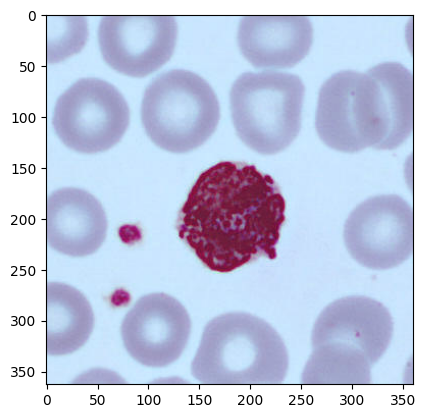


Cell Name:  Eosinophil


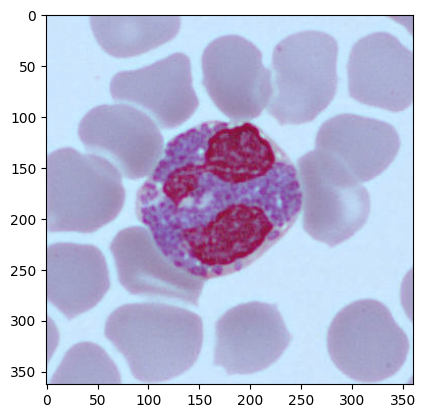


Cell Name:  Erythroblast


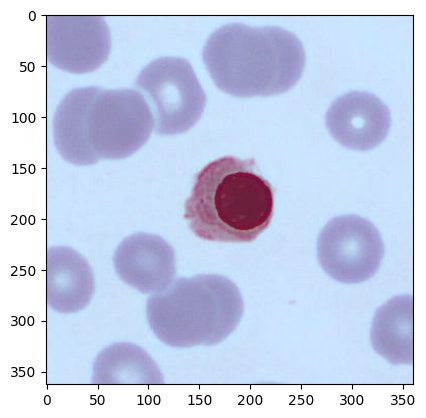


Cell Name:  Ig


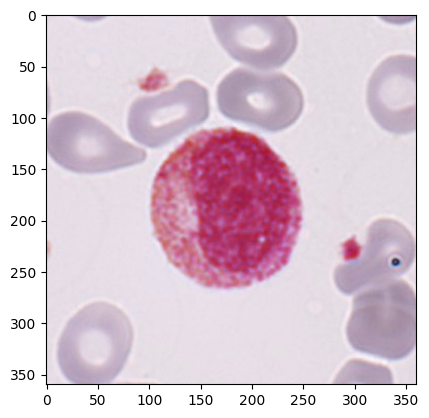


Cell Name:  Lymphocyte


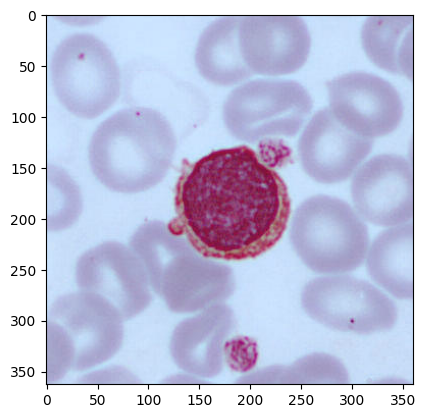


Cell Name:  Monocyte


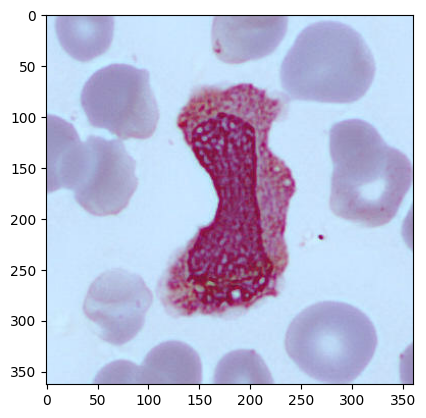


Cell Name:  Neutrophil


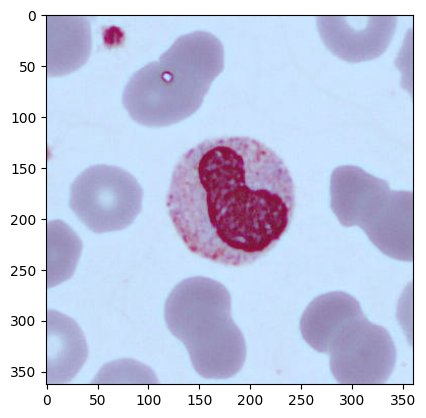


Cell Name:  Platelet


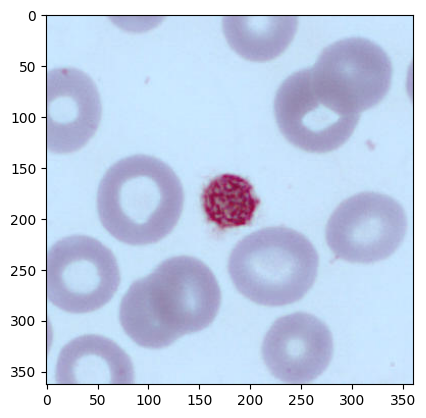

In [4]:
for label in labels_:
    path = os.path.join(data_path, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        print("Cell Name: ",label.title())
        plt.imshow(img_array)
        plt.show()
        print("")
        break
    

Now Let us Normalize the image arrays

In [5]:
images_data = np.squeeze(images_data)

images_data.shape
images_data = images_data.astype("float32")

images_data /= 255 

enc_lab = pd.Series(lab).map({'basophil':0,
 'eosinophil':1,
 'erythroblast':2,
 'ig':3,
 'lymphocyte':4,
 'monocyte':5,
 'neutrophil':6,
 'platelet':7})

print("Encoded Labels")
print(set(enc_lab))

no_of_classes = len(set(enc_lab))

lab = to_categorical(enc_lab , num_classes = no_of_classes)

lab[:10]


Encoded Labels
{0, 1, 2, 3, 4, 5, 6, 7}


array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

**Now let's split the data into**

1. **Training Data**

2. **Testing Data** 

In [6]:
# Now we will split data using train test split function keeping the test size of 30%

from sklearn.model_selection import train_test_split


## Make the Test size = 0.15
## Make the validation size = 0.15
## Reduce the Training size to 0.70

x_train,x_test,y_train,y_test = train_test_split(images_data , lab , test_size=0.25 ,train_size=0.75)




#### **Now building the CNN Model for Classification**

In [7]:
# Define the model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64,64,3)))
model.add(MaxPooling2D())


model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(8, activation='softmax'))



# Compile the model with SparseCategoricalCrossentropy loss and the Adam optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0

### **Building the CNN Model**

In [8]:
import time

epochs = 25

# Record the start time
start_time = time.time()

# Train the model
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  verbose=1
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
training_time = end_time - start_time

# Display the training time
print(f"Time taken to train the model: {training_time:.2f} seconds")

Epoch 1/25
401/401 [==============================] - 83s 203ms/step - loss: 1.1834 - accuracy: 0.5614
Epoch 2/25
401/401 [==============================] - 78s 195ms/step - loss: 0.5441 - accuracy: 0.8046
Epoch 3/25
401/401 [==============================] - 81s 201ms/step - loss: 0.3976 - accuracy: 0.8617
Epoch 4/25
401/401 [==============================] - 81s 203ms/step - loss: 0.3288 - accuracy: 0.8832
Epoch 5/25
401/401 [==============================] - 78s 195ms/step - loss: 0.2732 - accuracy: 0.9045
Epoch 6/25
401/401 [==============================] - 78s 195ms/step - loss: 0.2333 - accuracy: 0.9177
Epoch 7/25
401/401 [==============================] - 79s 197ms/step - loss: 0.2017 - accuracy: 0.9306
Epoch 8/25
401/401 [==============================] - 77s 193ms/step - loss: 0.1855 - accuracy: 0.9352
Epoch 9/25
401/401 [==============================] - 85s 211ms/step - loss: 0.1636 - accuracy: 0.9439
Epoch 10/25
401/401 [==============================] - 86s 214ms/step - l

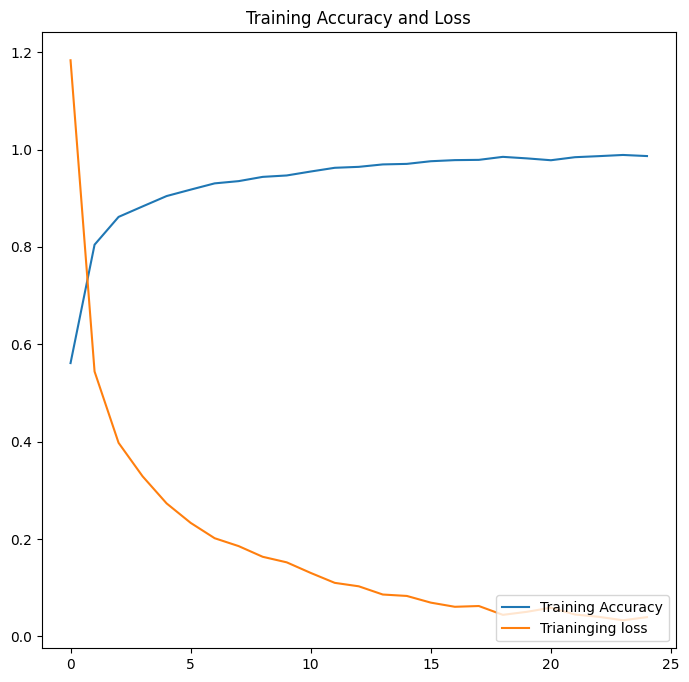

In [10]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Trianinging loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

plt.show()

#### **Now Exporting Our Model and Predicting the Test Data with it**

In [11]:
#
# Now we are exporting our model and will be
# Testing our model against the TestData 
# 

# Define a path to save the model
model_path = r"Classification of Cell"

# Save the TensorFlow model in the SavedModel format
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: Classification of Cell\assets


INFO:tensorflow:Assets written to: Classification of Cell\assets


In [12]:

# Loading the saved TensorFlow model
loaded_tf_model = tf.saved_model.load("Classification of Cell")

# **Remember** 

**Now, as we know that we are Developing a White Blood Cell Classification Model and We have 8 type of Cell Images**

**From Which Below 5 are White Blood Cell Type and Other are Not**

1. basophil
2. eosinophil
3. lymphocyte
4. monocyte
5. neutrophil


**So, Now the Model will predict on Test Data if the Cell Image belong to White blood cell or Not**

### **Note: In brackets is the True Cell Type and before bracket is the Predicted Type**

134/134 [==============================] - 10s 73ms/step


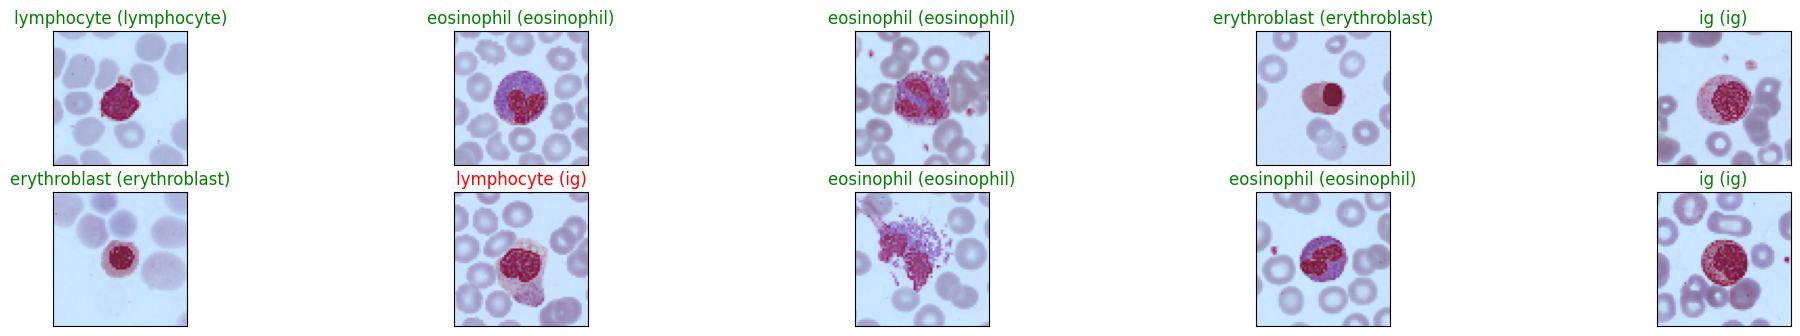

In [16]:
y_hat = model.predict(x_test)

labels = list(set(enc_lab))

# Plot a random sample of 10 test images, their predicted labels and True Labels 
# and then we can see how accurate our Model is working 
figure = plt.figure(figsize=(25, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels_[predict_index] , 
                                  labels_[true_index] ),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()



#### So, Looking into the above result we can say our Model is Working Perfectly and can be used for **White Blood Cell Classifications**